### Remapping GridSatB1 dataset into 0.1 deg x 0.1 deg from super high-resolution.
adding time dimension into 0.1-deg data for cdo mergetime

In [1]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset, date2num,num2date
from datetime import datetime

In [2]:
os.chdir('/data/willytsai/gridsat_BT/remap_0.1deg/2009_2018/')
#os.chdir('/data/willytsai/ISCCP/dynamo_ssa/gridsat_BT/')

In [3]:
files = sorted(glob.glob('*2014*')+glob.glob('*2015*')+glob.glob('*2016*')+
              glob.glob('*2017*')+glob.glob('*2018*')) # 2014-2018

In [ ]:
for n in range(len(files)):
    data = xr.open_dataset(files[n])
    data2 = data.sel(lat=slice(-30,30)) # tropical only
    lat_sav = data.sel(lat=slice(-30,30)).lat
    lon_sav = data.lon

    bt_contain = np.zeros((1,len(lat_sav),len(lon_sav)))
    bt_contain[0,:,:] = data2.irwin_cdr # Infrared Brightness temperature [K]
    ## writing netcdf for further processes    
    dataset = Dataset('/data/willytsai/gridsat_BT/remap_0.1deg/2009_2018/merged/'+files[n]
              ,'w',format='NETCDF4_CLASSIC')

    lat = dataset.createDimension('lat',len(lat_sav))
    lon = dataset.createDimension('lon',len(lon_sav))
    time = dataset.createDimension('time',None)

    # write variables
    latitude = dataset.createVariable('lat',np.float32,('lat'))
    longitude = dataset.createVariable('lon',np.float32,('lon'))
    time = dataset.createVariable('time', np.float64, ('time',))
    time.units = 'hours since 2000-01-01'
    time.long_name = 'time'
    times_arr = time[:]
    irwin_cdr = dataset.createVariable('irwin_cdr',np.float32,('time','lat','lon'))

    latitude[:] = lat_sav
    longitude[:] = lon_sav
    dates = datetime.strptime(files[n][11:24],'%Y.%m.%d.%H')
    times = date2num(dates, time.units)
    time[:] = times
    irwin_cdr[:,:] = bt_contain

    # Variable Attributes
    latitude.units = 'degree_north'
    longitude.units = 'degree_east'
    irwin_cdr.units = 'K'

    dataset.close()

In [4]:
ff = xr.open_dataset('/data/willytsai/gridsat_BT/remap_0.1deg/2009_2018/merged/GRIDSAT-B1.0.1deg.2014_2018.nc')

In [5]:
(ff.irwin_cdr)[0,:,:]

<xarray.DataArray 'irwin_cdr' (lat: 599, lon: 3600)>
[2156400 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2014-01-01
  * lon      (lon) float32 -179.875 -179.775 -179.675 ... 179.925 180.025
  * lat      (lat) float32 -29.925 -29.825 -29.725 ... 29.675 29.775 29.875
Attributes:
    units:    K

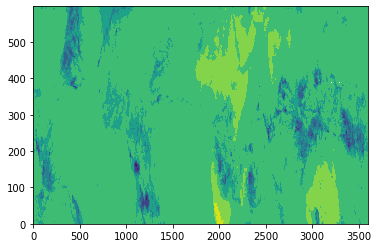

In [11]:
plt.contourf((ff.irwin_cdr)[3,:,:])

In [12]:
ff_ori = xr.open_dataset('/data/willytsai/gridsat_BT/remap_0.1deg/2009_2018/GRIDSAT-B1.2014.01.01.09._0.1deg.nc')

In [13]:
ff_ori

<xarray.Dataset>
Dimensions:    (lat: 601, lon: 3600)
Coordinates:
  * lon        (lon) float64 -179.9 -179.8 -179.7 -179.6 ... 179.8 179.9 180.0
  * lat        (lat) float64 -30.12 -30.02 -29.93 -29.82 ... 29.68 29.78 29.88
Data variables:
    irwin_cdr  (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Fri Mar 13 22:46:51 2020: cdo remapbil,mygrid GRIDSAT-B1.20...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

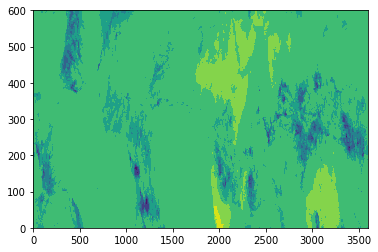

In [14]:
plt.contourf((ff_ori.irwin_cdr)[:,:])

In [ ]:
# year='2013'

# # save regridded data one by one for preventing memory shortage....
# for file_name in files:
#     if (file_name[22:24]=='00' or file_name[22:24]=='03' or
#         file_name[22:24]=='06' or file_name[22:24]=='09' or
#         file_name[22:24]=='12' or file_name[22:24]=='15' or
#         file_name[22:24]=='18' or file_name[22:24]=='21'):
        
#         os.chdir('/data/willytsai/gridsat_BT/'+year)
#         #os.chdir('/data/willytsai/ISCCP/dynamo_ssa/gridsat_BT/')        
#         bt_contain = np.nan*np.zeros((len(lat_sav),len(lon_sav))) # no data since 2018.10.01
        
#         data = xr.open_dataset(file_name)
#         data2 = data.sel(lat=slice(-30,30)) # tropical only
#         bt_contain[:,:] = data2.irwin_cdr # Infrared Brightness temperature [K]

#         ## writing netcdf for further processes    
#         dataset = Dataset('/data/willytsai/gridsat_BT/remap_0.1deg/'+year+'/'+file_name
#                   ,'w',format='NETCDF4_CLASSIC')

#         lat = dataset.createDimension('lat',len(lat_sav))
#         lon = dataset.createDimension('lon',len(lon_sav))

#         latitude = dataset.createVariable('lat',np.float32,('lat'))
#         longitude = dataset.createVariable('lon',np.float32,('lon'))
#         irwin_cdr = dataset.createVariable('irwin_cdr',np.float32,('lat','lon'))

#         latitude[:] = lat_sav
#         longitude[:] = lon_sav
#         irwin_cdr[:,:] = bt_contain

#         # Variable Attributes
#         latitude.units = 'degree_north'
#         longitude.units = 'degree_east'
#         irwin_cdr.units = 'K'

#         dataset.close()
#         #####
    
#         # regrid the output netcdf file to 0.25deg by CDO command on linux 
#         #os.chdir('/data/willytsai/gridsat_BT/remap_0.1deg/'+year)
#         os.chdir('/data/willytsai/gridsat_BT/remap_0.1deg/'+year)
#         os.system('cdo remapbil,mygrid'+' '+file_name+' '+file_name[:25]+'_0.1deg.nc')
#         os.system('rm '+file_name) # removing original high-res data with irwin_cdr 